In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import keras 
from keras.applications.resnet import ResNet152       

In [2]:
df = pd.read_csv('COVID.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,0,1,2,3,4,5,6,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,labels
0,0,0,23E99E2E-447C-46E5-8EB2-D35D12473C39.png,108,108,108,108,108,108,108,...,51,51,51,33,33,33,23,23,23,covid
1,1,1,jkms-35-e79-g001-l-e.jpg,78,78,78,34,34,34,34,...,53,53,53,51,51,51,42,42,42,covid
2,2,2,all14238-fig-0001-m-c.jpg,14,14,14,16,16,16,16,...,77,77,77,62,62,62,55,55,55,covid
3,3,3,acute-respiratory-distress-syndrome-ards.jpg,0,0,0,0,0,0,0,...,144,144,144,137,137,137,127,127,127,covid
4,4,4,kjr-21-e24-g002-l-b.jpg,109,109,109,88,88,88,89,...,129,129,129,129,129,129,144,144,144,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,146,146,IM-0166-0001.jpeg,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
298,147,147,NORMAL2-IM-0315-0001.jpeg,32,32,32,34,34,34,45,...,0,0,0,0,0,0,0,0,0,normal
299,148,148,person1290_virus_2215.jpeg,41,41,41,44,44,44,42,...,14,14,14,14,14,14,14,14,14,normal
300,149,149,person1_bacteria_2.jpeg,11,11,11,8,8,8,7,...,15,15,15,16,16,16,162,162,162,normal


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '0', '1', '2', '3', '4',
       '5', '6',
       ...
       '150519', '150520', '150521', '150522', '150523', '150524', '150525',
       '150526', '150527', 'labels'],
      dtype='object', length=150532)

In [4]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
df = df.set_index(['Unnamed: 0.1.1'])

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 150528), (61, 150528), (241,), (61,))

In [8]:
model = ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
X  = sc.fit_transform(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


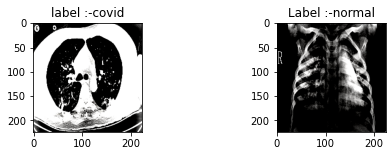

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
ax1.imshow(X[1].reshape(224, 224, 3).astype(float))
ax2.imshow(X[-1].reshape(224, 224, 3).astype(float))
ax1.title.set_text("label :-"+y[1])
ax2.title.set_text("Label :-"+y[-1])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=54)

In [14]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((243, 150528), (31, 150528), (28, 150528), (243,), (31,), (28,))

In [15]:
X_train = X_train.reshape(len(X_train), 224, 224, 3).astype(float)
X_test = X_test.reshape(len(X_test), 224, 224, 3).astype(float)
X_val = X_val.reshape(len(X_val), 224, 224, 3).astype(float)

In [16]:
lb = LabelEncoder()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)

In [17]:
df_liverpatient = pd.read_csv('COVID.csv')
df_liverpatient

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,0,1,2,3,4,5,6,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,labels
0,0,0,23E99E2E-447C-46E5-8EB2-D35D12473C39.png,108,108,108,108,108,108,108,...,51,51,51,33,33,33,23,23,23,covid
1,1,1,jkms-35-e79-g001-l-e.jpg,78,78,78,34,34,34,34,...,53,53,53,51,51,51,42,42,42,covid
2,2,2,all14238-fig-0001-m-c.jpg,14,14,14,16,16,16,16,...,77,77,77,62,62,62,55,55,55,covid
3,3,3,acute-respiratory-distress-syndrome-ards.jpg,0,0,0,0,0,0,0,...,144,144,144,137,137,137,127,127,127,covid
4,4,4,kjr-21-e24-g002-l-b.jpg,109,109,109,88,88,88,89,...,129,129,129,129,129,129,144,144,144,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,146,146,IM-0166-0001.jpeg,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
298,147,147,NORMAL2-IM-0315-0001.jpeg,32,32,32,34,34,34,45,...,0,0,0,0,0,0,0,0,0,normal
299,148,148,person1290_virus_2215.jpeg,41,41,41,44,44,44,42,...,14,14,14,14,14,14,14,14,14,normal
300,149,149,person1_bacteria_2.jpeg,11,11,11,8,8,8,7,...,15,15,15,16,16,16,162,162,162,normal


In [18]:
model = ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [19]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [20]:
from keras.layers import GlobalAveragePooling2D, Dense

In [21]:
x=model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='sigmoid')(x) 

In [22]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [23]:
from keras.models import Model

In [24]:
model=Model(inputs=model.input,outputs=preds)

In [25]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [26]:
for layer in model.layers:
    layer.trainable=False

In [27]:
model.compile(loss="categorical_crossentropy", optimizer='adam',
             metrics=['accuracy'])

In [28]:
from keras.utils import to_categorical

In [29]:
X_train = X_train.reshape(len(X_train), 224, 224, 3)

In [30]:
X_test = X_test.reshape(len(X_test), 224, 224, 3)


In [31]:
X_train.shape

(243, 224, 224, 3)

In [32]:
type(X_train)

numpy.ndarray

In [33]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [34]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [35]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [36]:
history = model.fit(x=X_train, y=y_train, steps_per_epoch=200,epochs=10, validation_data=(X_test, y_test), 
                    validation_steps=10)

Epoch 1/10
200/200 [==============================] - 99s 449ms/step - loss: 0.7158 - accuracy: 0.3960 - val_loss: 0.7102 - val_accuracy: 0.4194
Epoch 2/10
200/200 [==============================] - 74s 370ms/step - loss: 0.7115 - accuracy: 0.4196
Epoch 3/10
200/200 [==============================] - 76s 378ms/step - loss: 0.7095 - accuracy: 0.4236
Epoch 4/10
200/200 [==============================] - 75s 374ms/step - loss: 0.7135 - accuracy: 0.4070
Epoch 5/10
200/200 [==============================] - 74s 372ms/step - loss: 0.7146 - accuracy: 0.4121
Epoch 6/10
200/200 [==============================] - 75s 374ms/step - loss: 0.7098 - accuracy: 0.4135
Epoch 7/10
200/200 [==============================] - 8s 36ms/step - loss: 0.7237 - accuracy: 0.3846
